# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [2]:
dataDir = "../location-2/"
# dataDir = "C:/Users/Zenbook325E/Downloads/csv"
# dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2"

In [3]:
exec(open('/home/torr20/Documents/project-autonomous vehicle/behavior-hypotheses/src/notebooks/init_notebook.py').read())

current working dir/home/torr20/Documents/project-autonomous vehicle/behavior-hypotheses/src


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from behavior_tools.TrajectoryADECalculator import TrajectoryADECalculator
from behavior_tools.Sampler import Sampler
from tti_dataset_tools.ColMapper import ColMapper

from behavior_tools.AngularDisplacementCalculator import AngularDisplacementCalculator

In [6]:
sceneId = 210
date = "2023-05-04"
fps=10
minYDisplacement = 5
maxXDisplacement = 6
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))

In [7]:

visualizer = TrajectoryVisualizer()
adeCalculator = TrajectoryADECalculator()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity',
        speedCol='speed',
        fps=10,
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,   
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)

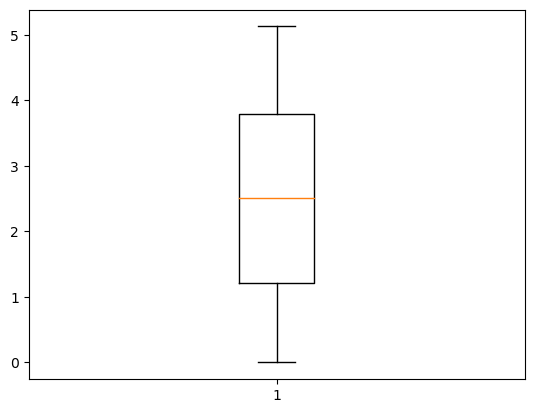

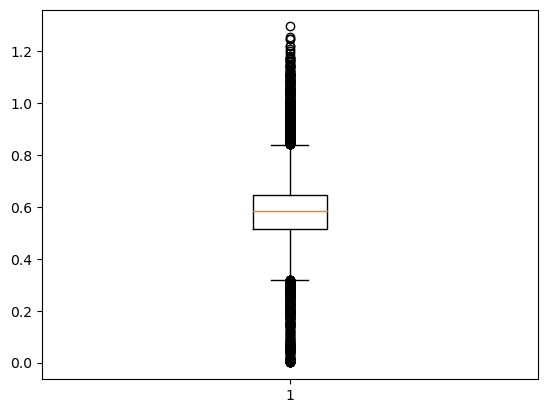

In [8]:

# transformer.deriveAcceleration(pedDf)
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])
plt.show()
# plt.boxplot(pedDf['acceleration'])
# plt.show()

In [9]:
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
cleanPedDf.head()

using min Y displacement (5)


,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
0,18,750,18023,210,5.0,0.629400,2.454854,-0.047612,0.481508,-0.044860,-0.028943,0.483857,0.000000,0.000000
1,18,752,18023,210,5.0,0.637141,2.358691,-0.038708,0.480816,-0.044520,0.003463,0.482371,0.007742,0.096163
2,18,754,18023,210,5.0,0.644921,2.261374,-0.038896,0.486585,0.000940,-0.028846,0.488137,0.015521,0.193480
3,18,756,18023,210,5.0,0.653314,2.163065,-0.041969,0.491544,0.015368,-0.024797,0.493333,0.023915,0.291789
4,18,758,18023,210,5.0,0.661952,2.065082,-0.043190,0.489915,0.006105,0.008146,0.491815,0.032553,0.389772


In [10]:
allPedIds = list(cleanPedDf["uniqueTrackId"].unique())
# clean023 = cleanPedDf[cleanPedDf["uniqueTrackId"]==18023].copy()
# visualizer.show(cleanPedDf,idCol='uniqueTrackId', xCol='localX', yCol='localY')
cleanPedDf.head()


,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
0,18,750,18023,210,5.0,0.629400,2.454854,-0.047612,0.481508,-0.044860,-0.028943,0.483857,0.000000,0.000000
1,18,752,18023,210,5.0,0.637141,2.358691,-0.038708,0.480816,-0.044520,0.003463,0.482371,0.007742,0.096163
2,18,754,18023,210,5.0,0.644921,2.261374,-0.038896,0.486585,0.000940,-0.028846,0.488137,0.015521,0.193480
3,18,756,18023,210,5.0,0.653314,2.163065,-0.041969,0.491544,0.015368,-0.024797,0.493333,0.023915,0.291789
4,18,758,18023,210,5.0,0.661952,2.065082,-0.043190,0.489915,0.006105,0.008146,0.491815,0.032553,0.389772


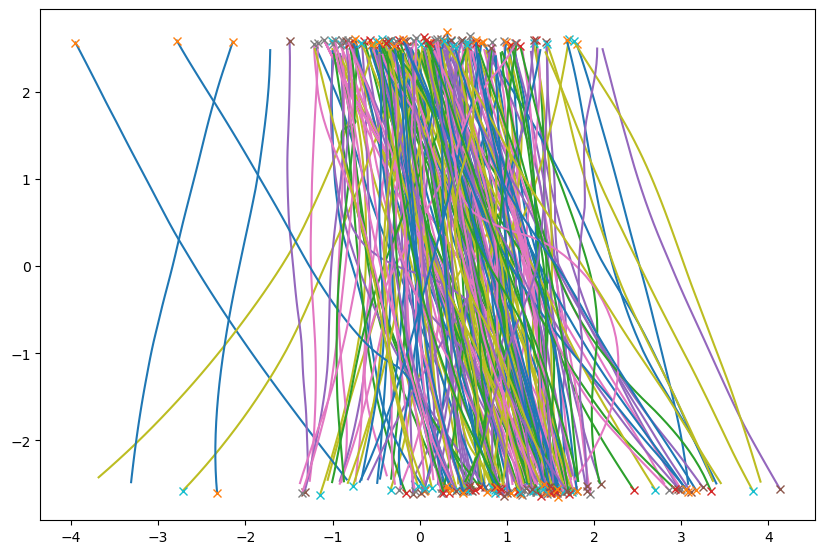

In [11]:
visualizer.show(cleanPedDf,idCol='uniqueTrackId', xCol='sceneX', yCol='sceneY')

In [12]:
transformer.translateAllToLocalSource(cleanPedDf)
cleanPedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,750,18023,210,5.0,0.629400,2.454854,-0.047612,0.481508,-0.044860,-0.028943,0.483857,0.000000,0.000000,0.000000,0.000000
1,18,752,18023,210,5.0,0.637141,2.358691,-0.038708,0.480816,-0.044520,0.003463,0.482371,0.007742,0.096163,0.007742,-0.096163
2,18,754,18023,210,5.0,0.644921,2.261374,-0.038896,0.486585,0.000940,-0.028846,0.488137,0.015521,0.193480,0.015521,-0.193480
3,18,756,18023,210,5.0,0.653314,2.163065,-0.041969,0.491544,0.015368,-0.024797,0.493333,0.023915,0.291789,0.023915,-0.291789
4,18,758,18023,210,5.0,0.661952,2.065082,-0.043190,0.489915,0.006105,0.008146,0.491815,0.032553,0.389772,0.032553,-0.389772


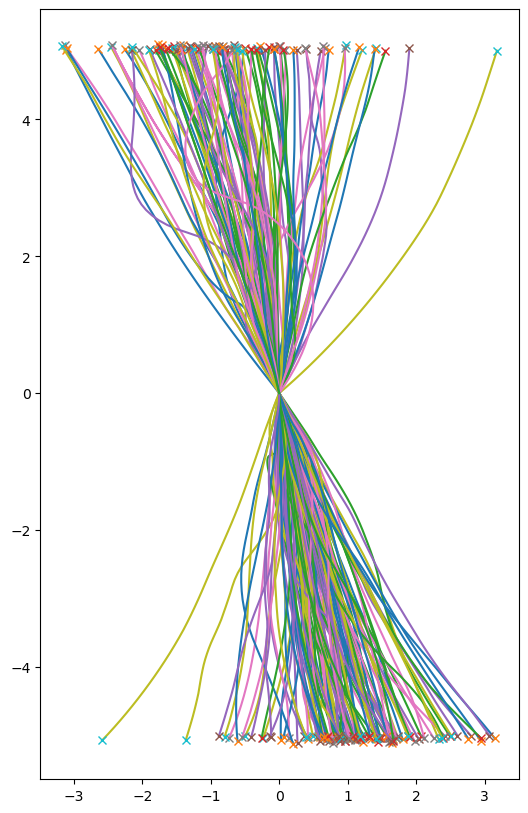

In [13]:
visualizer.show(cleanPedDf,idCol='uniqueTrackId', xCol='localX', yCol='localY')

In [14]:
df=cleanPedDf.drop_duplicates(subset=['uniqueTrackId'], keep='first')
df

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,750,18023,210,5.0,0.629400,2.454854,-0.047612,0.481508,-0.044860,-0.028943,0.483857,0.0,0.0,0.0,0.0
182,18,4178,18069,210,5.0,0.498700,2.487143,-0.183917,0.588037,0.036357,-0.063849,0.616128,0.0,0.0,0.0,0.0
225,18,5365,18090,210,5.0,0.211069,2.428388,0.044465,0.759751,0.029923,-0.123330,0.761051,0.0,0.0,0.0,0.0
356,18,7401,18121,210,5.0,0.123679,2.466498,-0.174618,0.582298,-0.058051,-0.048604,0.607917,0.0,0.0,0.0,0.0
457,18,8295,18134,210,5.0,1.029705,2.494648,0.014841,0.443795,0.005339,-0.055881,0.444043,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25424,29,23824,29446,210,5.0,2.036787,2.496586,-0.025571,0.426935,-0.216918,-0.015622,0.427701,0.0,0.0,0.0,0.0
25481,29,24718,29467,210,5.0,1.323369,-2.490842,0.181813,-0.555104,-0.017466,-0.003906,0.584120,0.0,0.0,0.0,0.0
25747,29,27589,29532,210,5.0,1.510095,-2.484964,0.182053,-0.444417,0.010969,-0.010805,0.480260,0.0,0.0,0.0,0.0
25801,29,27658,29533,210,5.0,1.476579,-2.469654,0.084257,-0.474527,-0.046576,-0.006068,0.481949,0.0,0.0,0.0,0.0


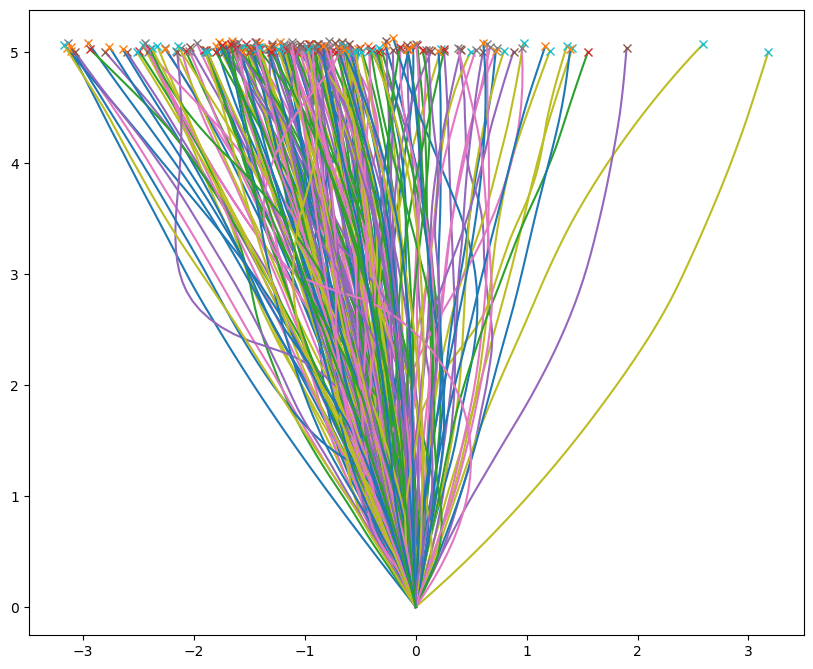

In [15]:

# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# allPedIds = list(cleanPedDf["uniqueTrackId"].unique())
# transformer.translateAllToLocalSource(cleanPedDf)
# clean023 = cleanPedDf[cleanPedDf["uniqueTrackId"]==18023].copy()
# visualizer.show(cleanPedDf.iloc[0:1,],idCol='uniqueTrackId', xCol='localX', yCol='localY')

southIds = []
for pedId in allPedIds:
    trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == pedId]
    trackMeta = tracksMeta[tracksMeta["uniqueTrackId"] == pedId].iloc[0]
    # print(trackMeta['verticalDirection'])
    if trackMeta['verticalDirection'] == "SOUTH":
        southIds.append(pedId)
        # print(trackMeta["uniqueTrackId"])
        X, Y = transformer.rotate180(trackDf, 'localX', 'localY')
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localX'] = X
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localY'] = Y
        # trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == pedId]
        # X,Y = transformer.translateOneToLocalSource(trackDf)
        # cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localX'] = X
        # cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localY'] = Y
# len(cleanPedDf)
visualizer.show(cleanPedDf,idCol='uniqueTrackId', xCol='localX', yCol='localY')
# southIds, cleanPedDf = transformer.convertTracksToNorth(cleanPedDf, 'sceneX','sceneY',tracksMeta)
# transformer.translateAllToLocalSource(cleanPedDf)
# visualizer.show(cleanPedDf,idCol='uniqueTrackId', xCol='localX', yCol='localY')

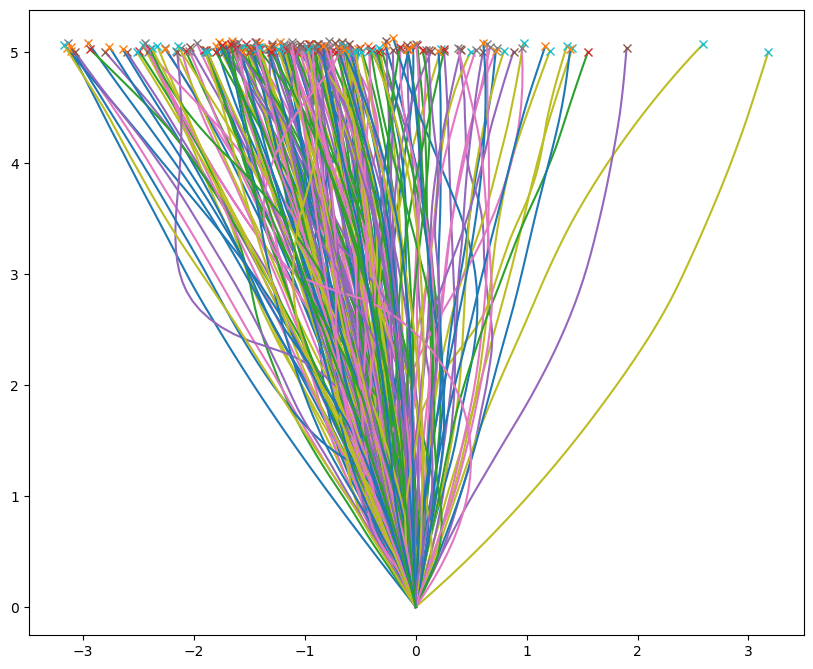

In [16]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
trackIds = cleanPedDf["uniqueTrackId"].unique()
localXe=[]
localYe=[]
for trackId in trackIds:
    trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == trackId]
    #collect and append the localX and localY values in a list
    localXe.append(trackDf["localX"].tolist())
    localYe.append(trackDf["localY"].tolist())
    ax.plot(trackDf["localX"], trackDf["localY"])
    #plot the localX and localY values after the loop
    # ax.plot(trackDf[], localYe)
    lastX = trackDf["localX"].iloc[-1]
    lastY = trackDf["localY"].iloc[-1]
    plt.plot(lastX, lastY, marker='x')
    # plt.plot(localXe[-1], localYe[-1], marker='x')

ax.set_aspect('equal', adjustable='box')
plt.show()

In [17]:
#print number of trackIds
print(len(trackIds))
print(len(localXe))
print(len(localYe))
print(localXe)


237
237
237
[[-0.0, -0.007741539013891741, -0.015520674869509365, -0.02391452420224216, -0.03255255383230682, -0.0407347716726737, -0.05030698383966503, -0.0608153252032031, -0.07183219488313264, -0.08302829544251655, -0.09424318114450558, -0.10264873912269468, -0.10786008189792073, -0.10977560334475367, -0.11137963252830962, -0.11382969212335159, -0.11646337360628867, -0.11988196301078258, -0.12507985178602665, -0.1316154076931212, -0.14052650096786024, -0.15203183959975264, -0.16511407057187966, -0.18015695320241198, -0.1980471630086521, -0.21758520274392712, -0.23851228339340869, -0.26010366611304603, -0.2804387935480219, -0.2962477591227274, -0.3100142187468855, -0.3212477036958735, -0.33032103002799273, -0.3399590122427145, -0.3507560213468539, -0.3623330916408761, -0.37514047591027144, -0.3886677921268096, -0.4042205213928003, -0.42235739781120984, -0.44115555459218947, -0.4612622407395639, -0.48119657119953985, -0.5025593931272578, -0.527301905857658, -0.5552502893234514, -0.585

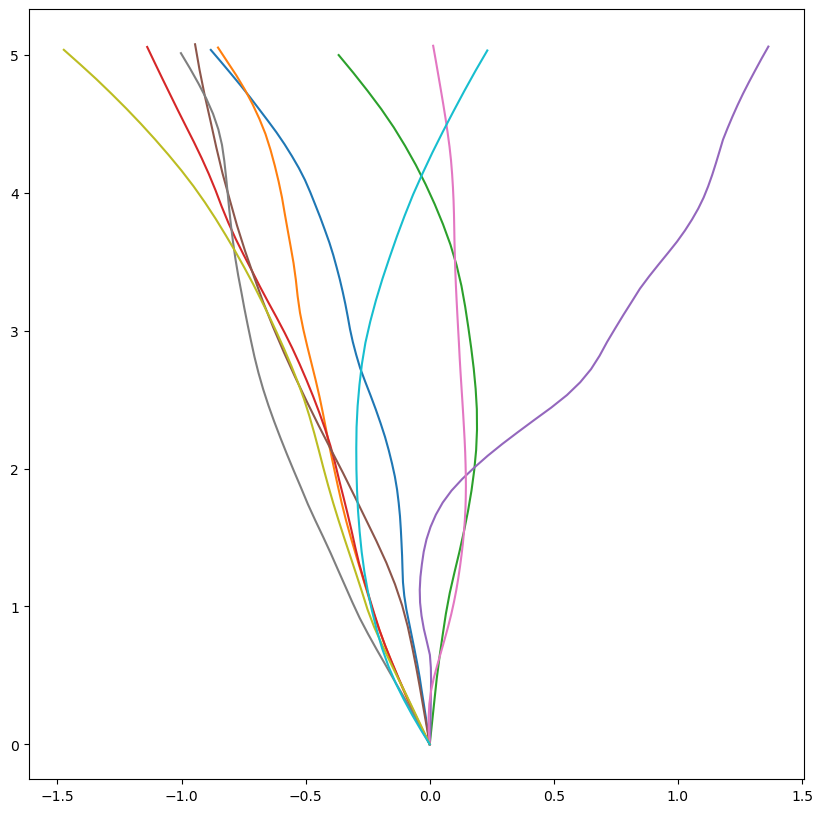

In [18]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.plot(localXe[i], localYe[i])
# plt.plot(localXe[0], localYe[0])
plt.show()

In [28]:
from scipy.interpolate import interp1d
import numpy as np

def calculate_error(x_original, y_original, spline):
    y_spline = spline(x_original)

    # error = np.sqrt((x_original - x_original)**2 + (y_original - y_spline)**2)
    error = np.abs(y_original - y_spline)
    max_error = np.max(error)
    return max_error, error
# Function to calculate the curvature of the graph
# def curvature(x, y):
#     dx = np.gradient(x)
#     dy = np.gradient(y)
#     ddx = np.gradient(dx)
#     ddy = np.gradient(dy)
#     curvature = np.abs(ddx * dy - dx * ddy) / (dx**2 + dy**2)**1.5
#     return curvature
def calculate_curvature(x, y):
    dy = np.gradient(y, x)
    d2y = np.gradient(dy, x)
    curvature = np.abs(d2y)
    return curvature

# plt.figure(figsize=(10, 10))
for i in range(10):
    x = (np.array(localXe[i]))
    y = (np.array(localYe[i]))
    x_nodes = [x[0], x[-1]]
    y_nodes = [y[0], y[-1]]
    # plt.plot(x, y, label='data')
    # plt.scatter(x_nodes, y_nodes, color='red', label='nodes')
    threshold_error = 0.0
    max_iterations = 20
    # if i ==6:
    #     max_iterations = 20
    iteration = 0
    # curvature = calculate_curvature(x, y)
    interp1d(x_nodes, y_nodes, kind='linear')
    while iteration < max_iterations:
        #a linear spline based on current nodes
        linear_spline = interp1d(x_nodes, y_nodes, kind='linear',fill_value="extrapolate")

        max_error, error = calculate_error(x, y, linear_spline)

        if max_error < threshold_error:
            break

        # curve_curvature = curvature(x, linear_spline(x))
        # priority_matric = error * curvature
        max_error_index = np.argmax(error)
        new_node_x = x[max_error_index]
        new_node_y = y[max_error_index]
        # max_curvature_index = np.argmax(curve_curvature)

        # if error[max_error_index] > threshold_error:
        #     new_node_x = x[max_error_index]
        #     new_node_y = y[max_error_index]
        # else:
        #     new_node_x = x[max_curvature_index]
        #     new_node_y = y[max_curvature_index]
        # x_nodes = np.sort(np.append(x_nodes, new_node_x))
        # y_nodes = y[np.isin(x,x_nodes)]  # Recalculate y_nodes based on new x_nodes
        y_nodes = np.sort(np.append(y_nodes, new_node_y)) 
        x_nodes = x[np.isin(y, y_nodes)]

        iteration += 1
    interp1d(x_nodes, y_nodes, kind='linear')
    plt.figure(figsize=(10, 10))
    plt.plot(x, y, label='Original Curvy Graph', color='red')
    plt.plot(x_nodes, y_nodes, label='Refined Linear Spline', color='orange')
    plt.scatter(x_nodes, y_nodes, color='red', label='Spline Nodes')
    plt.legend()
    plt.savefig(os.path.join('/home/torr20/Documents/project-autonomous vehicle/behavior-hypotheses/images2', f'plot_{i}.png'))  # Save the plot with a unique filename
    plt.close()  # Close the plot to free memory

plt.show()

In [16]:
# for si in southIds:
#     print(cleanPedDf.loc[cleanPedDf["uniqueTrackId"]!=si, ["localX", "localY"]])
cleanPedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,750,18023,210,5.0,0.629400,2.454854,-0.047612,0.481508,-0.044860,-0.028943,0.483857,0.000000,0.000000,-0.000000,-0.000000
1,18,752,18023,210,5.0,0.637141,2.358691,-0.038708,0.480816,-0.044520,0.003463,0.482371,0.007742,0.096163,-0.007742,0.096163
2,18,754,18023,210,5.0,0.644921,2.261374,-0.038896,0.486585,0.000940,-0.028846,0.488137,0.015521,0.193480,-0.015521,0.193480
3,18,756,18023,210,5.0,0.653314,2.163065,-0.041969,0.491544,0.015368,-0.024797,0.493333,0.023915,0.291789,-0.023915,0.291789
4,18,758,18023,210,5.0,0.661952,2.065082,-0.043190,0.489915,0.006105,0.008146,0.491815,0.032553,0.389772,-0.032553,0.389772


: 

### Right side of the vertical axis is negative

In [18]:

startingDf = cleanPedDf[cleanPedDf["displacementY"] < 1].copy()
midDf = cleanPedDf[(cleanPedDf["displacementY"] >= 1) & (cleanPedDf["displacementY"] < 4)].copy()
endDf = cleanPedDf[(cleanPedDf["displacementY"] >= 4)].copy()
startingDf.head(10)

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,750,18023,210,5.0,0.629400,2.454854,-0.047612,0.481508,-0.044860,-0.028943,0.483857,0.000000,0.000000,-0.000000,-0.000000
1,18,752,18023,210,5.0,0.637141,2.358691,-0.038708,0.480816,-0.044520,0.003463,0.482371,0.007742,0.096163,-0.007742,0.096163
2,18,754,18023,210,5.0,0.644921,2.261374,-0.038896,0.486585,0.000940,-0.028846,0.488137,0.015521,0.193480,-0.015521,0.193480
3,18,756,18023,210,5.0,0.653314,2.163065,-0.041969,0.491544,0.015368,-0.024797,0.493333,0.023915,0.291789,-0.023915,0.291789
4,18,758,18023,210,5.0,0.661952,2.065082,-0.043190,0.489915,0.006105,0.008146,0.491815,0.032553,0.389772,-0.032553,0.389772
5,18,760,18023,210,5.0,0.670135,1.967831,-0.040911,0.486252,-0.011395,0.018314,0.487970,0.040735,0.487023,-0.040735,0.487023
6,18,762,18023,210,5.0,0.679707,1.870670,-0.047861,0.485808,0.034750,0.002224,0.488159,0.050307,0.584184,-0.050307,0.584184
7,18,764,18023,210,5.0,0.690215,1.773153,-0.052542,0.487584,0.023403,-0.008883,0.490407,0.060815,0.681701,-0.060815,0.681701
8,18,766,18023,210,5.0,0.701232,1.674626,-0.055084,0.492634,0.012713,-0.025248,0.495704,0.071832,0.780228,-0.071832,0.780228
9,18,768,18023,210,5.0,0.712428,1.575365,-0.055981,0.496305,0.004481,-0.018357,0.499452,0.083028,0.879489,-0.083028,0.879489


{'whiskers': [<matplotlib.lines.Line2D at 0x76c990049100>,
 'caps': [<matplotlib.lines.Line2D at 0x76c990049640>,
 'boxes': [<matplotlib.lines.Line2D at 0x76c990066eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x76c990049b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x76c990049dc0>],
 'means': []}

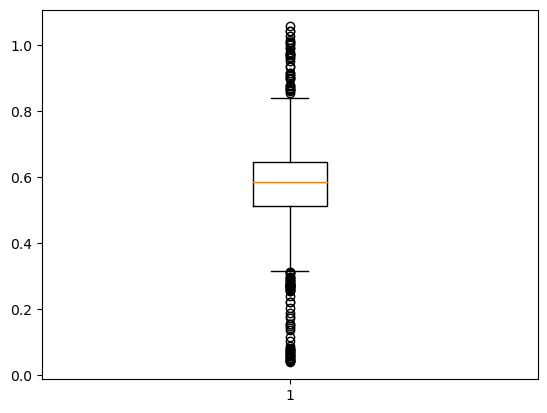

In [19]:
plt.boxplot(startingDf["speed"])

In [20]:
# get the pedestrians who started at almost 0 speed.
# get pedestrians who started at almost the median speed.
medianStartingSpeed = startingDf["speed"].median()
medianStartingVelocityDf = startingDf[abs(startingDf["speed"] - medianStartingSpeed) < 0.005].copy()
medianStartingVelocityPedIds = list(medianStartingVelocityDf["uniqueTrackId"].unique())
# medianStartingVelocityPedIds

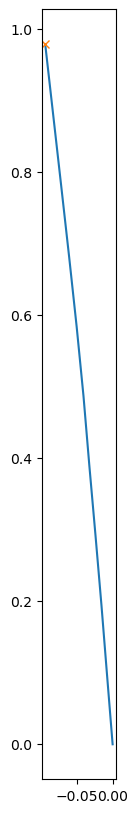

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,750,18023,210,5.0,0.629400,2.454854,-0.047612,0.481508,-0.044860,-0.028943,0.483857,0.000000,0.000000,-0.000000,-0.000000
1,18,752,18023,210,5.0,0.637141,2.358691,-0.038708,0.480816,-0.044520,0.003463,0.482371,0.007742,0.096163,-0.007742,0.096163
2,18,754,18023,210,5.0,0.644921,2.261374,-0.038896,0.486585,0.000940,-0.028846,0.488137,0.015521,0.193480,-0.015521,0.193480
3,18,756,18023,210,5.0,0.653314,2.163065,-0.041969,0.491544,0.015368,-0.024797,0.493333,0.023915,0.291789,-0.023915,0.291789
4,18,758,18023,210,5.0,0.661952,2.065082,-0.043190,0.489915,0.006105,0.008146,0.491815,0.032553,0.389772,-0.032553,0.389772
5,18,760,18023,210,5.0,0.670135,1.967831,-0.040911,0.486252,-0.011395,0.018314,0.487970,0.040735,0.487023,-0.040735,0.487023
6,18,762,18023,210,5.0,0.679707,1.870670,-0.047861,0.485808,0.034750,0.002224,0.488159,0.050307,0.584184,-0.050307,0.584184
7,18,764,18023,210,5.0,0.690215,1.773153,-0.052542,0.487584,0.023403,-0.008883,0.490407,0.060815,0.681701,-0.060815,0.681701
8,18,766,18023,210,5.0,0.701232,1.674626,-0.055084,0.492634,0.012713,-0.025248,0.495704,0.071832,0.780228,-0.071832,0.780228
9,18,768,18023,210,5.0,0.712428,1.575365,-0.055981,0.496305,0.004481,-0.018357,0.499452,0.083028,0.879489,-0.083028,0.879489


In [21]:
starting023 = startingDf[startingDf["uniqueTrackId"] == 18023].copy()
visualizer.show(starting023, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
# starting023.size
starting023

In [22]:
starting023 = AngularDisplacementCalculator.addAngularDisplacement(starting023)
starting023 = AngularDisplacementCalculator.addRelativeAngularDisplacement(starting023)
starting023

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY,angularDisplacement,relativeAngularDisplacement,absoluteAngularDisplacement
0,18,750,18023,210,5.0,0.629400,2.454854,-0.047612,0.481508,-0.044860,-0.028943,0.483857,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000
1,18,752,18023,210,5.0,0.637141,2.358691,-0.038708,0.480816,-0.044520,0.003463,0.482371,0.007742,0.096163,-0.007742,0.096163,4.602626,0.000000,0.000000
2,18,754,18023,210,5.0,0.644921,2.261374,-0.038896,0.486585,0.000940,-0.028846,0.488137,0.015521,0.193480,-0.015521,0.193480,4.586357,-0.016269,0.016269
3,18,756,18023,210,5.0,0.653314,2.163065,-0.041969,0.491544,0.015368,-0.024797,0.493333,0.023915,0.291789,-0.023915,0.291789,4.685391,0.099034,0.099034
4,18,758,18023,210,5.0,0.661952,2.065082,-0.043190,0.489915,0.006105,0.008146,0.491815,0.032553,0.389772,-0.032553,0.389772,4.774086,0.088696,0.088696
5,18,760,18023,210,5.0,0.670135,1.967831,-0.040911,0.486252,-0.011395,0.018314,0.487970,0.040735,0.487023,-0.040735,0.487023,4.781115,0.007028,0.007028
6,18,762,18023,210,5.0,0.679707,1.870670,-0.047861,0.485808,0.034750,0.002224,0.488159,0.050307,0.584184,-0.050307,0.584184,4.921881,0.140766,0.140766
7,18,764,18023,210,5.0,0.690215,1.773153,-0.052542,0.487584,0.023403,-0.008883,0.490407,0.060815,0.681701,-0.060815,0.681701,5.097927,0.176046,0.176046
8,18,766,18023,210,5.0,0.701232,1.674626,-0.055084,0.492634,0.012713,-0.025248,0.495704,0.071832,0.780228,-0.071832,0.780228,5.260147,0.162220,0.162220
9,18,768,18023,210,5.0,0.712428,1.575365,-0.055981,0.496305,0.004481,-0.018357,0.499452,0.083028,0.879489,-0.083028,0.879489,5.393035,0.132888,0.132888


In [23]:
newAngularDisplacementDf = AngularDisplacementCalculator.getPedAngularDisplacementDf(startingDf)
newAngularDisplacementDf

,uniqueTrackId,count,maxAngularDisplacement,meanAbsoluteAngularDisplacement,meanAngularDisplacement,maxRelativeAngularDisplacement,meanAbsoluteRelativeAngularDisplacement,meanRelativeAngularDisplacement,maxSpeed,meanSpeed
0,18023,11,5.499709,4.509298,4.509298,0.176046,0.084511,0.081553,0.499737,0.490995
1,18069,9,17.109814,13.187375,13.187375,0.978747,0.428190,-0.428190,0.648834,0.631765
2,18090,7,3.923593,3.052550,-3.052550,0.199870,0.078657,-0.077659,0.802478,0.786039
3,18121,9,15.576390,12.877389,12.877389,0.459739,0.256554,-0.256554,0.618203,0.609641
4,18134,11,2.035930,0.872912,-0.044892,0.934981,0.303687,0.303687,0.479898,0.465436
...,...,...,...,...,...,...,...,...,...,...
232,29446,11,8.611168,5.465019,-5.465019,1.606265,0.695290,-0.673037,0.488508,0.464422
233,29467,10,20.116793,17.768814,17.768814,0.175623,0.077150,0.077150,0.586158,0.560428
234,29532,12,22.148625,20.160966,20.160966,0.054427,0.020154,-0.016322,0.480260,0.473395
235,29533,10,12.028110,10.425354,10.425354,0.464476,0.198838,0.040439,0.521367,0.505813


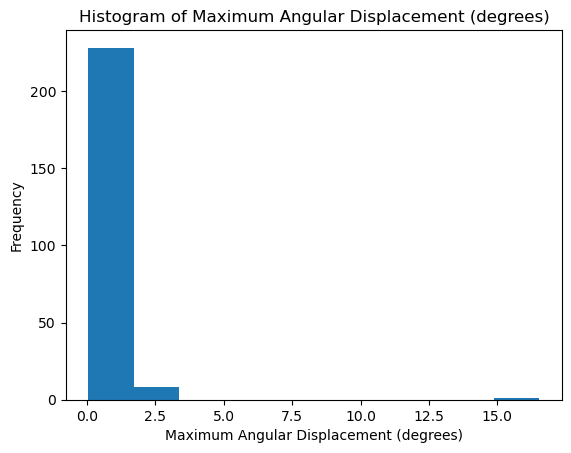

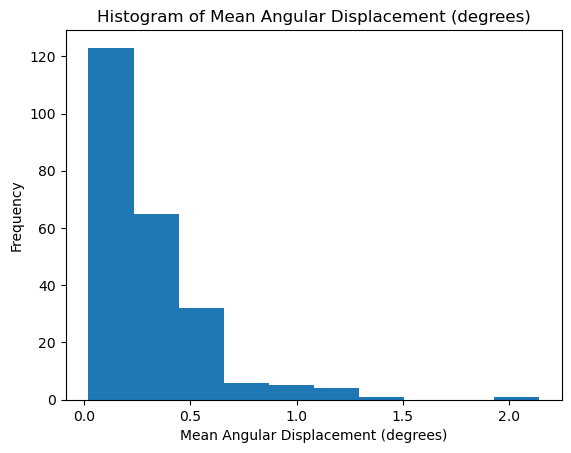

In [24]:
def show_histogram(df, column_name, axis_label):
    plt.hist(df[column_name])
    plt.xlabel(axis_label)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {axis_label}")
    plt.show()
    
show_histogram(newAngularDisplacementDf, "maxRelativeAngularDisplacement", "Maximum Angular Displacement (degrees)")
show_histogram(newAngularDisplacementDf, "meanAbsoluteRelativeAngularDisplacement", "Mean Angular Displacement (degrees)")


<Axes: xlabel='meanRelativeAngularDisplacement', ylabel='maxRelativeAngularDisplacement'>

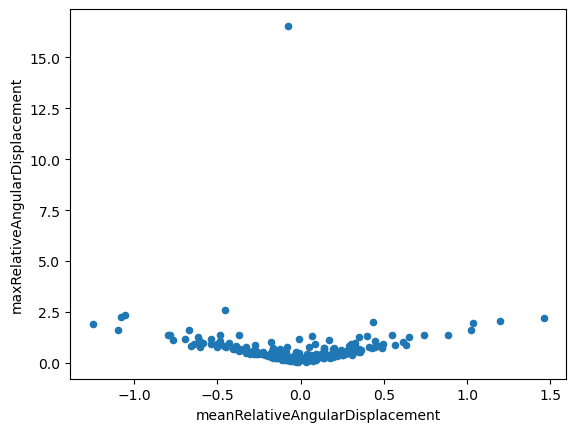

In [25]:
# ommit the first two columns
# plot between meanRelativeAngularDisplacement and maxRelativeAngularDisplacement
newAngularDisplacementDf.iloc[:, 2:].plot(kind='scatter', x='meanRelativeAngularDisplacement', y='maxRelativeAngularDisplacement')